In [159]:
import tensorflow
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading Data from Product Demand Sample Data file and Filtering by One Product

In [150]:
df = pd.read_csv('../data/Historical Product Demand.csv' ,encoding='utf-8',nrows=100000)
df = df[df['Product_Code'] == 'Product_0979']
df['Date']= pd.to_datetime(df['Date']) 
df.head()
#df = df.set_index('Date')
#df = df.sort_index()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
5,Product_0979,Whse_J,Category_028,2012-04-19,500


### Coverting into a univariate timeseries data

In [152]:
df = df[['Date','Order_Demand']].groupby(['Date']).sum()
df['Order_Demand'] =  df['Order_Demand'].astype('int64')
df.head(10)

,Order_Demand
Date,
2012-01-03,2000
2012-01-05,3800
2012-01-06,200
2012-01-10,10300
2012-01-12,10400
2012-01-13,500
2012-01-16,6900
2012-01-17,5300
2012-01-18,1700


In [153]:
len(df)

212

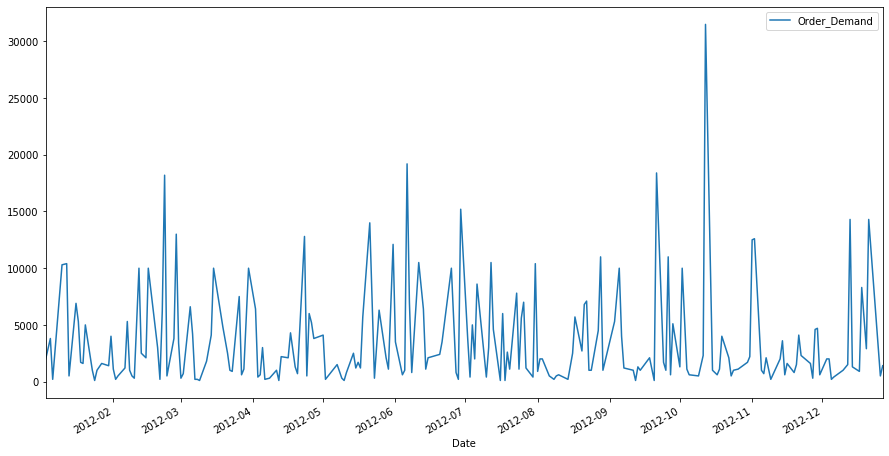

In [156]:
df.plot(use_index=True,figsize=(15,8))

### Convering the data into timeseries sequences to pass in as features

In [158]:
def split_sequence(sequence,n_steps):
    X,y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [172]:
n_steps = 4
sequence = df['Order_Demand'].values
train_sequence, test_sequence = sequence[:int(len(sequence)* 0.8)], sequence[int(len(sequence)* 0.8):]
X,y = split_sequence(train_sequence,4)

### Define Simple MLP model

In [173]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

### Model Training

In [174]:
epochs = 200
model.fit(X, y, epochs=epochs, verbose=0)

### Model Accuracy and Validation

In [175]:
test_X,test_y = split_sequence(test_sequence,4)

In [181]:
predict_y = []
for x_input in test_X:
    x_input = x_input.reshape((1, n_steps))
    yhat = model.predict(x_input, verbose=0)
    predict_y.append(yhat[0][0])

In [189]:
#printing mean square error
print("MSE:{}".format(np.square(np.subtract(test_y, predict_y)).mean()))

MSE:20405119.83221452


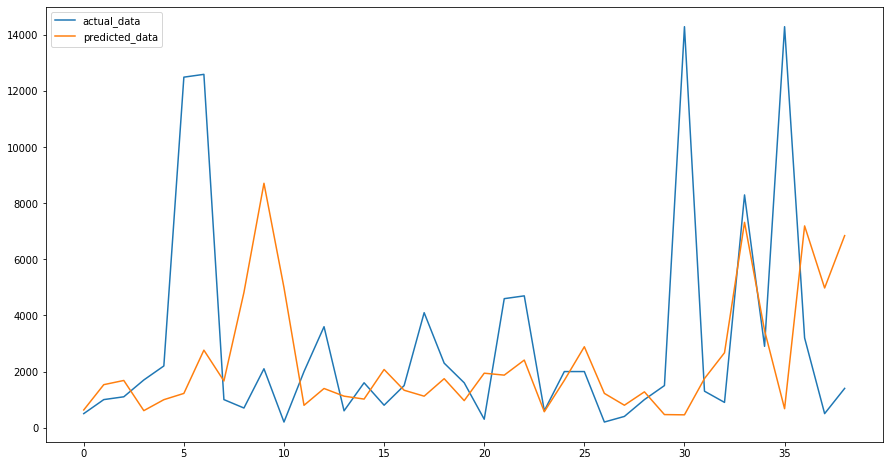

In [191]:
plt.figure(figsize=(15,8))
plt.plot(test_y, label='actual_data')
plt.plot(predict_y, label='predicted_data')
plt.legend()
plt.show()